# In this notebook will examine multiple datasets.


## Part 1) In this part of the notebook we will analyze a penguins dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins_1 = penguins.copy()

In [4]:
penguins_1.dropna(inplace=True)

In [5]:
penguins_island = penguins_1['island'].unique().tolist()

In [6]:
penguins_plot_1 = [penguins_1[penguins_1['island'] == island]['species'].value_counts().reset_index() for island in penguins_island]

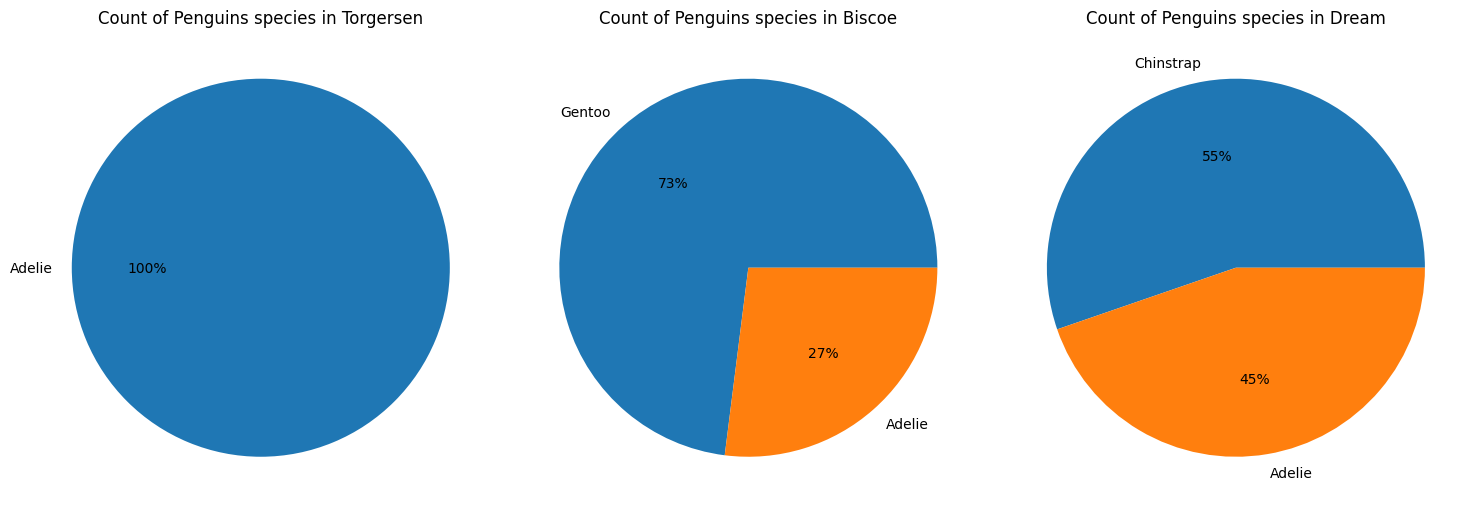

In [7]:
fig, ax = plt.subplots(1, 3, figsize = (15, 10))

for i, df in enumerate(penguins_plot_1):
  ax[i].pie(df['count'], labels = df['species'], autopct = '%1.0f%%')
  ax[i].set_title(f'Count of Penguins species in {penguins_island[i]}')

plt.tight_layout()
plt.show()

* These piecharts here show percentage of each species in each island.

In [8]:
penguins_var = penguins_1.columns[2:6].tolist()

In [9]:
penguins_plot_2 = [penguins_1.pivot_table(index = 'species', columns = 'sex', values = var, aggfunc = 'median') for var in penguins_var]

In [10]:
penguins_var_2 = ['Bill length in mm', 'Bill depth in mm', 'Flipper length in mm', 'Body mass in g']

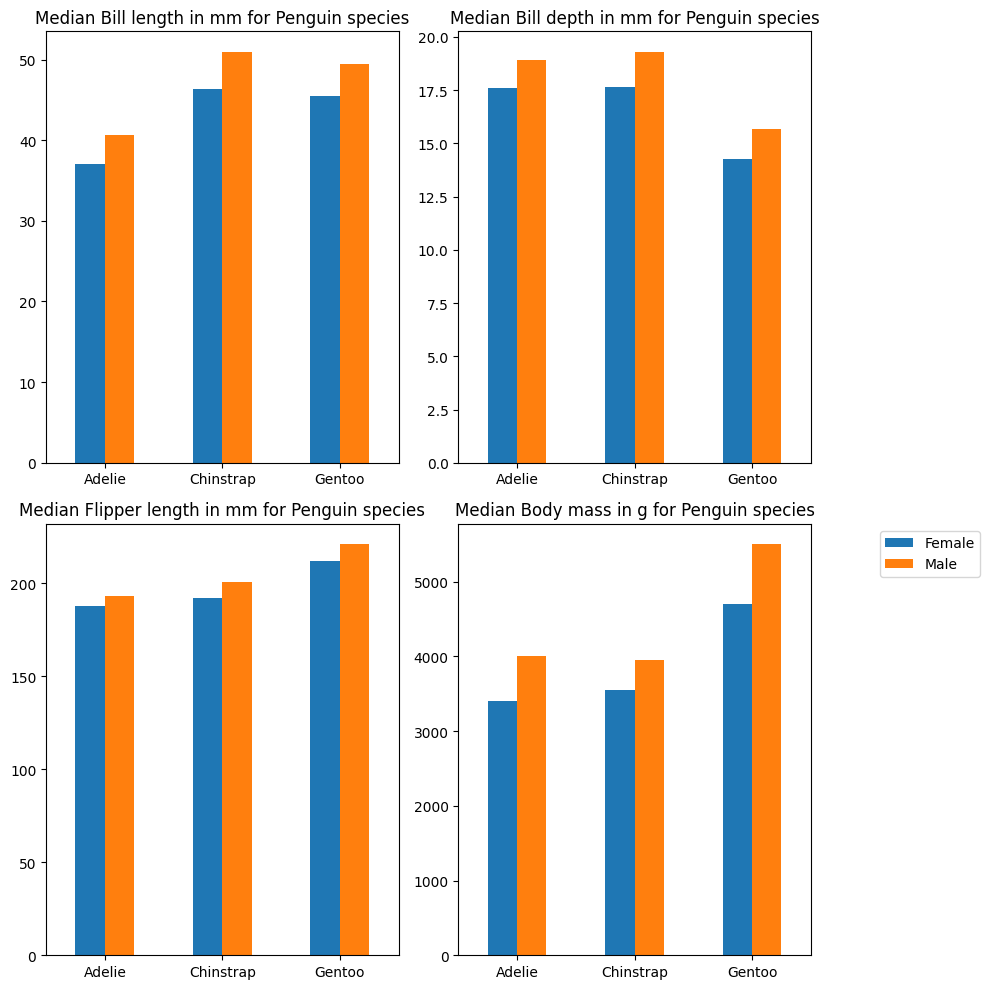

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax = ax.flatten()

for i, df in enumerate(penguins_plot_2):
    df.plot(kind = 'bar', ax = ax[i])
    ax[i].set_title(f'Median {penguins_var_2[i]} for Penguin species')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis = 'x', labelrotation = 0)
    ax[i].legend().remove()

plt.legend(loc = 'upper right', bbox_to_anchor = (1.5, 1))
plt.tight_layout()
plt.show()

* These bar charts here show comparison of each feature of a penguin for each species of penguin.
* The median bill length seems to be highest for Chinstrap followed by Gentoo and Adelie.
* The medain bill depth seems to be highest for Chinstrap followed by Adelie and Gentoo.
* The median flipper length seems to be the highest in Gentoo followed by Chinstrap and Adelie.
* The median body mass seems to be the highest in Gentoo. The male mass for Adelie seems to be higher than the male mass of Chinstrap. The female mass for Adelie seems to be less than the female mass of Chinstrap.

In [12]:
penguins_adelie = penguins[penguins['species'] == 'Adelie']

In [13]:
penguins_plot_3 = [penguins_adelie.groupby('island')[var].median().reset_index() for var in penguins_var]

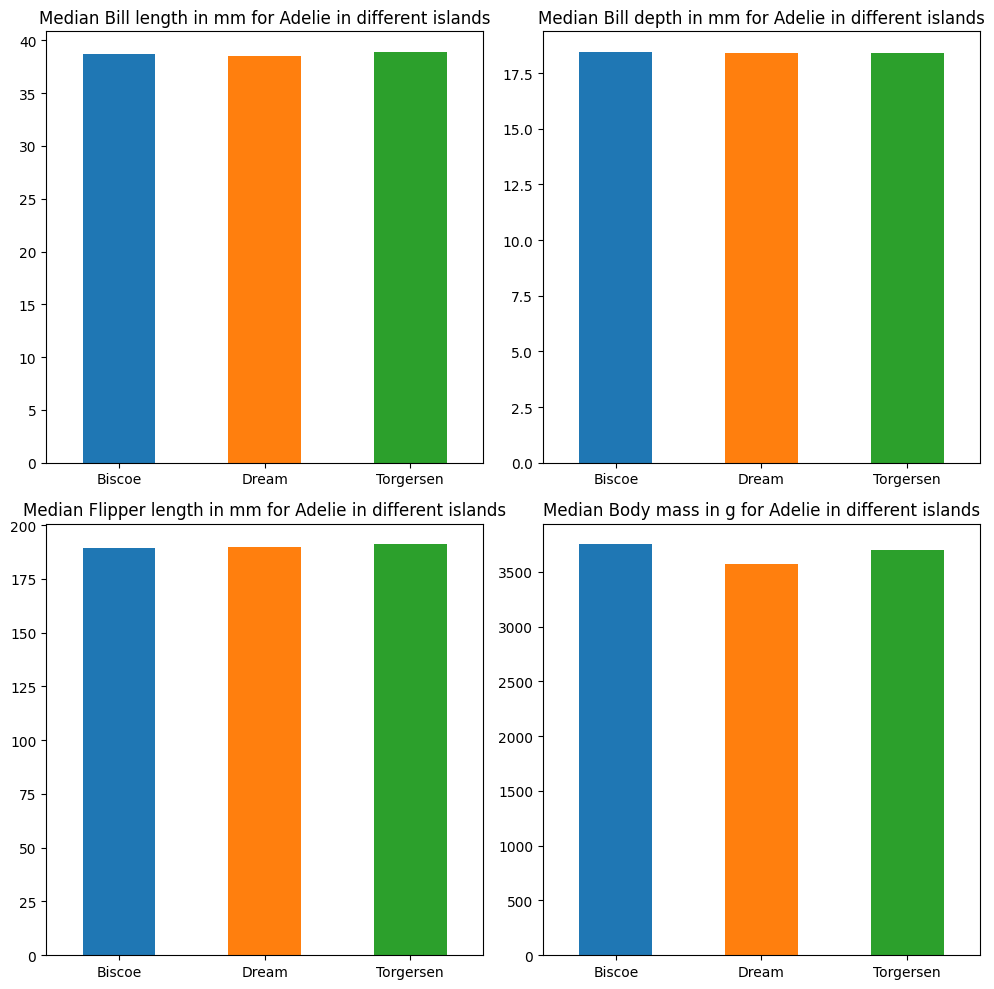

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax = ax.flatten()

for i, df in enumerate(penguins_plot_3):
    df.plot(kind = 'bar', x = 'island', y = penguins_var[i], ax = ax[i], color = sns.color_palette('tab10'))
    ax[i].set_title(f'Median {penguins_var_2[i]} for Adelie in different islands')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis = 'x', labelrotation = 0)
    ax[i].legend().remove()


plt.tight_layout()
plt.show()

* Earlier we saw that Adelie species in every island. I was curious to see if there were any difference in feature of the Adelie in different islands.
* Here we can see that there is the features of Adelie species in different islands to very similar.

## Part 2) Here we will analyze tips percentage and total bill at a restaurant.

In [15]:
tips = sns.load_dataset('tips')

In [16]:
tips_1 = tips.copy()

In [17]:
tips_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips_1['tip_percentage'] = (tips_1['tip'] / tips_1['total_bill']) * 100

In [19]:
tips_1['Week_Day'] = tips_1['day'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')

In [20]:
tips_1_var = ['tip_percentage', 'total_bill']

In [21]:
tips_1_analysis = [tips_1.pivot_table(index = 'Week_Day', columns = 'time', values = var, aggfunc = 'median') for var in tips_1_var]

<ipython-input-21-f52b19586113>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips_1_analysis = [tips_1.pivot_table(index = 'Week_Day', columns = 'time', values = var, aggfunc = 'median') for var in tips_1_var]
<ipython-input-21-f52b19586113>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips_1_analysis = [tips_1.pivot_table(index = 'Week_Day', columns = 'time', values = var, aggfunc = 'median') for var in tips_1_var]


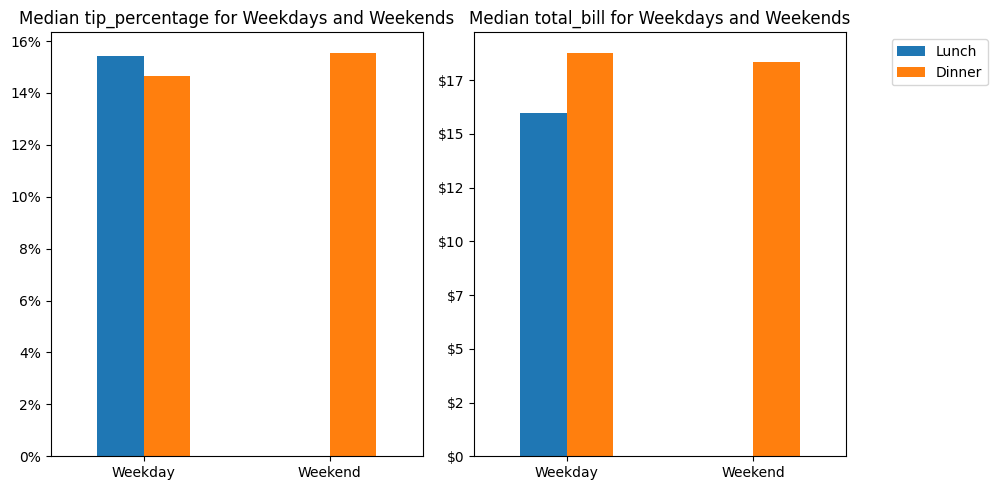

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

for i, df in enumerate(tips_1_analysis):
  df.plot(kind = 'bar', ax = ax[i])
  ax[i].set_title(f'Median {tips_1_var[i]} for Weekdays and Weekends')
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].tick_params(axis = 'x', labelrotation = 0)
  ax[i].legend().remove()

ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.legend(loc = 'upper right', bbox_to_anchor = (1.4, 1))
plt.tight_layout()
plt.show()


* These bar charts here give us an insight on the median of tip percentage and total bill for Weekdays and Weekends.
* We can see that Lunch is not offered during Weekends.
* The tips percentage seems to slightly higher during Lunch on a Weekday compared to Dinner on a Weekday.
* The tip percentage seems to be higher during Dinner on a Weekend compared to the Dinner on a Weekday.
* The total bill seems to be higher during Dinner on a Weekday compared to Lunch on a weekday.
* The total bill seems to be higher during Dinner on a Weekday compared to Dinner on a Weekend.

## Part 3) In this analysis we will examine a life expectancy datasets and gather some insights.

In [23]:
healthexp = sns.load_dataset('healthexp')

In [24]:
healthexp_1 = healthexp.copy()

In [25]:
healthexp_1_pivot = healthexp_1.pivot_table(index = 'Year', columns = 'Country', values = 'Spending_USD')
healthexp_1_pivot.head()

Country,Canada,France,Germany,Great Britain,Japan,USA
Year,,,,,,
1970,NaN,192.143,252.311,123.993,150.437,326.961
1971,313.391,NaN,298.251,134.172,163.854,357.988
1972,NaN,NaN,337.364,NaN,185.390,397.097
1973,NaN,NaN,384.541,NaN,205.778,439.302
1974,NaN,NaN,452.744,NaN,242.018,495.114


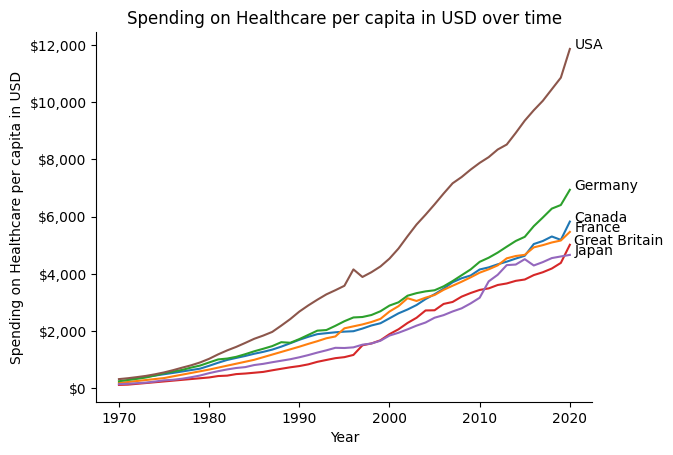

In [26]:
sns.lineplot(healthexp_1_pivot, dashes = False, palette = 'tab10')
sns.despine()
plt.title('Spending on Healthcare per capita in USD over time')
plt.xlabel('Year')
plt.ylabel('Spending on Healthcare per capita in USD')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))
for i in range(healthexp_1_pivot.shape[1]):
  plt.text(healthexp_1_pivot.index[-1] + 0.5, healthexp_1_pivot.iloc[-1,i], healthexp_1_pivot.columns[i])
plt.show()

* In this line chart here we can see that for all countries above the healthcare spending has increased over time.
* The healthcare spending for the United States has increased a lot more over time compared to other countries where the healthcare spending increases are closer to each other.

In [27]:
healthexp_1_pivot_2 = healthexp_1.pivot_table(index = 'Year', columns = 'Country', values = 'Life_Expectancy')

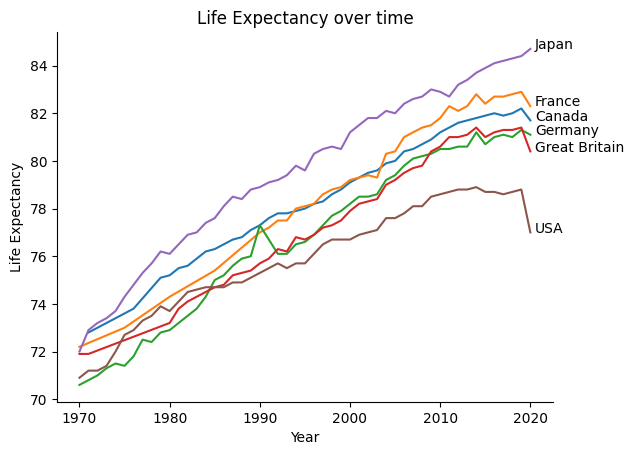

In [28]:
sns.lineplot(healthexp_1_pivot_2, dashes = False, palette = 'tab10')
sns.despine()
plt.title('Life Expectancy over time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend().remove()
for i in range(healthexp_1_pivot_2.shape[1]):
  plt.text(healthexp_1_pivot_2.index[-1] + 0.5, healthexp_1_pivot_2.iloc[-1,i], healthexp_1_pivot_2.columns[i])
plt.show()

* The line chart here show that the Life Expectancy over time has increased as well if you exclude the decline toward the end in 2020 which was most likely affected by COVID-19.
* The line chart also shows that the life expectancy for the United States is a lot lower than the other countries despite spending the most on health care.
* Another country to note is Germany which spends the second most and the life expectancy is relatively to the other countries excluding the United States.
* Another country to note is Japan which spends relatively less compared to the countries above has the highest overall Life Expectancy compared to the countries above.


## Here we will create a linear regression on this dataset.

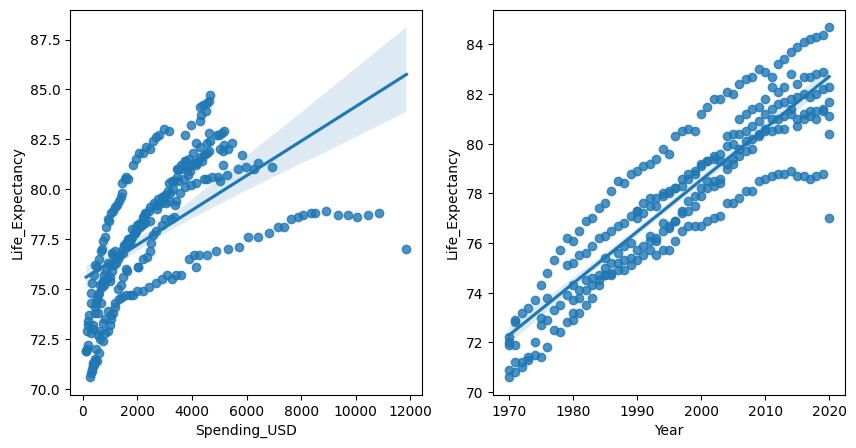

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.regplot(x = 'Spending_USD', y = 'Life_Expectancy', data = healthexp_1, ax = ax[0])
sns.regplot(x = 'Year', y = 'Life_Expectancy', data = healthexp_1, ax = ax[1])
plt.show()

* The reggplot between Spending_USD and Life Expectancy shows an inital increase in life expectacy with spending which kind of levels off as spending increases.
* This is most likely an indication that at a certain point spending will not have as much affect on life expectancy.
* The reggplot between Year and Life Expectancy shows a linear relationship.
* This most likely indicates that over time as technology and medical treatments improve life expectancy will also increase.
* For the linear regression we will only include Year.  

In [30]:
lm = ols('Life_Expectancy ~ Year', data = healthexp_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1190.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          2.56e-101
Time:                        18:40:15   Log-Likelihood:                -483.07
No. Observations:                 274   AIC:                             970.1
Df Residuals:                     272   BIC:                             977.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -338.3279     12.068    -28.036      0.0

* The R squared value is 0.814 which indicates that 81.4% of the variance in Life Expectancy can be explained by Year.
* The coeffecient is 0.2084 indicating the Life Expectancy on average increases by 0.2084 with one additional increase in Year.
* The p value for Year is 0.000 which indicates the affect on Year on Life Expectancy is statistically significant.


## Part 4) In this part we will perform a logistics regression on a SUV sales dataset.

In [31]:
suv = pd.read_csv('/content/suv_data.csv')

In [32]:
suv_1 = suv.copy()

In [33]:
suv_1.drop('User ID', axis = 1, inplace = True )

In [34]:
label_encoder = LabelEncoder()

In [35]:
suv_1['Gender'] = label_encoder.fit_transform(suv_1['Gender'])

In [36]:
X = suv_1.drop('Purchased', axis = 1)
y = suv_1['Purchased']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
clf = LogisticRegression().fit(X_train, y_train)

In [39]:
print(f'Precision: {precision_score(y_test, clf.predict(X_test))}')
print(f'Accuracy: {accuracy_score(y_test, clf.predict(X_test))}')
print(f'Recall: {recall_score(y_test, clf.predict(X_test))}')
print(f'F1: {f1_score(y_test, clf.predict(X_test))} ')

Precision: 0.9130434782608695
Accuracy: 0.8875
Recall: 0.75
F1: 0.8235294117647058 


The scores show how well the model performed and its effectiveness in classifying predictions correctly.